In [112]:
list_variables = ["cphSDRT", "cphSDTH", "cphSDRC", "cphSDTL", "cphSDRI", "cphRTHRint", 
                  "cphRTTH", "cphRTRC", "cphRTTL", "cphRTST"]
for e in list_variables:
    if e in globals():
        continue
    else:
        print("We don't have all Hazard ratios yet")

In [123]:
display(cphRTST.summary)

,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,z,p,-log2(p)
cage,0.000297,1.000297,0.000298,-0.000287,0.000881,0.999713,1.000881,0.996247,3.191302e-01,1.647783
group_1,1.122070,3.071205,0.181397,0.766539,1.477601,2.152304,4.382419,6.185725,6.181754e-10,30.591265


,comparison,lowerCI,upperCI,coef,p-value
0,Rapa/Tram_high,-1.477601,-0.766539,-1.122070,6.180000e-10
1,Trametinib_high,-0.901640,-0.266588,-0.584114,3.120000e-04
2,Rapamycin_continuous,-1.387052,-0.681373,-1.034213,9.000000e-09
3,Trametinib_low,-0.507309,0.109871,-0.198719,2.069010e-01
4,Rapamycin_intermittent,-0.985499,-0.347127,-0.666313,4.300000e-05


,comparison,lowerCI,upperCI,coef,p-value
0,Rapamycin_intermittent,0.093371,0.768903,0.431137,1.235700e-02
1,Trametinib_high,0.289491,0.992467,0.640979,3.510000e-04
2,Rapamycin_continuous,-0.342454,0.375155,0.016351,9.288320e-01
3,Trametinib_low,0.664091,1.398100,1.031095,3.600000e-08
4,Standard,0.766539,1.477601,1.122070,6.000000e-10


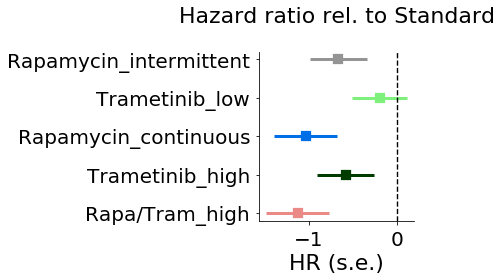

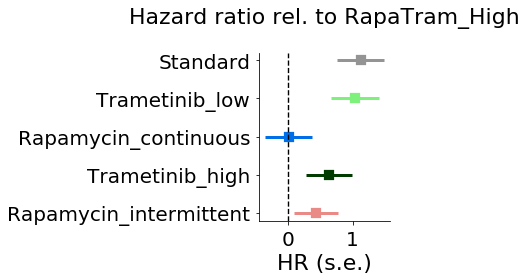

In [124]:
# MALES
al69dict = {"comparison" : ["Rapa/Tram_high", "Trametinib_high", "Rapamycin_continuous", "Trametinib_low", "Rapamycin_intermittent"], 
            "lowerCI" : [-1.477601, -0.901640, -1.387052, -0.507309, -0.985499], 
            "upperCI" : [-0.766539, -0.266588, -0.681373, 0.109871, -0.347127], 
            "coef": [-1.122070, -0.584114, -1.034213, -0.198719, -0.666313], 
           "p-value":[0.000000000618, 0.000312, 0.000000009, 0.206901, 0.000043]}
al69df = pd.DataFrame.from_dict(al69dict, orient = "columns")
plot_cumCPH(al69df, "Standard")
display(al69df)

al69dict = {"comparison" : ["Rapamycin_intermittent", "Trametinib_high", "Rapamycin_continuous", "Trametinib_low", "Standard"], 
            "lowerCI" : [0.093371, 0.289491, -0.342454, 0.664091, 0.766539], 
            "upperCI" : [0.768903, 0.992467, 0.375155, 1.398100, 1.477601], 
            "coef": [0.431137, 0.640979, 0.016351, 1.031095, 1.122070], 
           "p-value": [0.012357, 0.000351, 0.928832, 0.000000036, 0.0000000006]}
al69df = pd.DataFrame.from_dict(al69dict, orient = "columns")
plot_cumCPH(al69df, "RapaTram_High")
display(al69df)

In [ ]:
### FEMALES

### NEW CORRECTED
al69dict = {"comparison" : ["Rapa/Tram_high", "Trametinib_high", "Rapamycin_continuous", "Trametinib_low", "Rapamycin_intermittent"], 
            "lowerCI" : [-1.636872, -0.805394, -1.570706, -0.923990, -1.189824], 
            "upperCI" : [-0.822338, -0.030949, -0.773344, -0.188579, -0.428282], 
            "coef": [-1.229605, -0.418172, -1.172025, -0.556284, -0.809053], 
           "p-value":[0.0000000032, 0.034292, 0.0000000083, 0.003025, 0.000031]}
al69df = pd.DataFrame.from_dict(al69dict, orient = "columns")
plot_cumCPH(al69df, "Standard")
display(al69df)

al69dict = {"comparison" : ["Rapamycin_intermittent", "Trametinib_high", "Rapamycin_continuous", "Trametinib_low", "Standard"], 
            "lowerCI" : [-0.020546, 0.555741, -0.353544, 0.229072, 0.822338], 
            "upperCI" : [0.797115, 1.519198, 0.451195, 1.142873, 1.636872], 
            "coef": [0.388285, 1.037470, 0.048826, 0.685973, 1.229605], 
           "p-value": [0.062678, 0.000024, 0.812011, 0.003255, 0.0000000032]}
al69df = pd.DataFrame.from_dict(al69dict, orient = "columns")
plot_cumCPH(al69df, "RapaTram_High")
display(al69df)

In [113]:
def get_DF_cumCPH(list_df):
    a = []
    for e, c in list_df:
        l = []
        l.append(c)
        t = pd.DataFrame(e.confidence_intervals_)
        l.append(t.iloc[1:]["95% lower-bound"].values)
        l.append(t.iloc[1:]["95% upper-bound"].values)
        l.append(pd.DataFrame(e.params_).iloc[1:].values)
        a.append(l)

    dcph = pd.DataFrame(a, columns = ["comparison", "lowerCI", "upperCI", "coef"])
    return(dcph)

def plot_cumCPH(dcph, text):
    fig, ax = plt.subplots(figsize = (6,4))
    
    if text == "SD":
        co = ['#EBC69B', '#EBC69B', '#006ee6', '#7DF17B', '#EA8A86']
    else:
        co = ['#EA8A86', '#003c00', '#006ee6', '#7DF17B', '#949494']
        
    plt.scatter(x=dcph["coef"].to_list(),y=dcph["comparison"].to_list(), 
                color = co, 
                #color = "red",
               marker = "s", s = 100)
    plt.errorbar(x = dcph["coef"].to_list(), y=dcph["comparison"].to_list(), 
                 xerr=(dcph["lowerCI"] - dcph["coef"]).to_list(), linestyle='', 
                 #color = "red",
                 color = co,
                 elinewidth=3)


    ax.set_xlabel("HR (s.e.)", fontsize = 22)
    ax.tick_params(axis = "x", labelsize=20)
    ax.tick_params(axis = "y", labelsize=20)
    plt.title("Hazard ratio rel. to {}\n".format(text), fontsize = 22)
    plt.axvline(x=0,color='black', linestyle = "--")
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    matplotlib.rcParams['pdf.fonttype'] = 42
    plt.tight_layout()

    if run_type != "dry":
        plt.savefig("{}cph_ALL-{}_{}_cens.svg".format(path, text, new_day))
        plt.savefig("{}cph_ALL-{}_{}_cens.pdf".format(path, text, new_day))
    else:
        plt.show()

In [90]:
#study_sw = "Rapa_Tram_high"
#study_sw = "Rapamycin_intermittent"
#study_sw = "Trametinib_high"
#study_sw = "Rapamycin_continuous"
study_sw = "Trametinib_low"

In [91]:
#import lifelines
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
#from lifelines.utils import datetimes_to_durations
#from lifelines.utils import survival_table_from_events
from lifelines.statistics import multivariate_logrank_test
from lifelines import CoxPHFitter
from lifelines.statistics import pairwise_logrank_test
import statsmodels.stats.multitest as multi
import numpy as np
import datetime
from IPython.display import display

plt.style.use("seaborn-paper")

new_day = datetime.datetime.now().strftime("%Y%m%d")
day = datetime.datetime.now().strftime("%d.%m.%Y")

path = "../analysis/plots/"
cph_path = "../analysis/plots/"

#run_type = "dry"
run_type = "wet"

#sex = "f"
sex = "m"

palette2 = {"Standard":"#949494", "Rapamycin_intermittent": "#EA8A86",
            "Rapa_Tram_high":"#EBC69B", "Trametinib_high":"#003c00", 
            "Rapamycin_continuous":"#006ee6", "Trametinib_low":"#7DF17B"}

res_file = "results_{}_HRLoopLifespan_{}_{}.txt".format(study_sw, sex, new_day)

In [92]:
poo1 = pd.read_csv("../data/lifespan_drugs_LG.csv", sep = ";",
                 index_col = "ID")
poo1.columns = ['Cage', 'ID.1', 'Sex', 'Line', 'DOB', 'DOD', 'Reason_of_death',
       'Age', 'Treatment', 'Unnamed: 10', 'Kommentare', 'Age_(wk)',
       'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16']
poo1["event"] = 1

poo1["Treatment"] = poo1["Treatment"].replace("Rapa/Tram_high", "Rapa_Tram_high")

In [93]:
# Subset sex
poo1 = poo1[poo1["Sex"] == sex]
# Drop rows of mice from other switches weeks switch

if study_sw == "Rapamycin_intermittent":
    poo = poo1[poo1["Treatment"] != "Trametinib_high"]
    poo = poo[poo["Treatment"] != "Trametinib_low"]
    poo = poo[poo["Treatment"] != "Rapamycin_continuous"]
elif study_sw == "Rapa_Tram_high":
    poo = poo1[poo1["Treatment"] != "Trametinib_high"]
    poo = poo[poo["Treatment"] != "Rapamycin_continuous"]
    poo = poo[poo["Treatment"] != "Trametinib_low"]
    poo = poo[poo["Treatment"] != "Rapamycin_intermittent"]
elif study_sw == "Trametinib_high":
    poo = poo1[poo1["Treatment"] != "Rapamycin_continuous"]
    poo = poo[poo["Treatment"] != "Trametinib_low"]
    poo = poo[poo["Treatment"] != "Rapamycin_intermittent"]
elif study_sw == "Rapamycin_continuous":
    poo = poo1[poo1["Treatment"] != "Rapamycin_intermittent"]
    poo = poo[poo["Treatment"] != "Trametinib_high"]
    poo = poo[poo["Treatment"] != "Trametinib_low"]
elif study_sw == "Trametinib_low":
    poo = poo1[poo1["Treatment"] != "Rapamycin_continuous"]
    poo = poo[poo["Treatment"] != "Trametinib_high"]
    poo = poo[poo["Treatment"] != "Rapamycin_intermittent"]
else:
    print("ERROR: no switch selected")
    exit(1)

In [94]:
string = f"\n\n ===== COMPARISON Standard and RapaTram vs {study_sw}====="

if run_type != "dry":
    with open("{}{}".format("./", res_file), "a") as fi:
        fi.write(string + "\n\n")
else:
    print(string)

In [95]:
print(string)



 ===== COMPARISON Standard and RapaTram vs Trametinib_low=====


In [96]:
string = "Original animals:\n{}".format(poo["Treatment"].value_counts())
if run_type != "dry":
    with open("{}{}".format("./", res_file), "a") as fi:
        fi.write(string + "\n\n")
else:
    print(string)

In [97]:
print(string)

Original animals:
Standard          88
Trametinib_low    78
Rapa_Tram_high    63
Name: Treatment, dtype: int64


In [98]:
# Make a event column if dead = 1 if not dead = 0
poo.loc[:,"event"] = poo.loc[:,'DOD'].apply(lambda x: 0 if pd.isna(x) else 1)
# Get the extent of the life of the mice so its numeric and easy to use

poo.loc[:,"DOB"] = pd.to_datetime(poo.loc[:,"DOB"], dayfirst = True)
poo.loc[:,"DOD"] = poo.loc[:,"DOD"].apply(lambda x: day if pd.isna(x) else x)
poo.loc[:,'DOD'] = pd.to_datetime(poo.loc[:,'DOD'], dayfirst = True)
#
# If no value in date, put today plus 10 days
poo.loc[:,'durations'] = (poo.loc[:,'DOD'] - poo.loc[:,'DOB']).dt.days

In [99]:
string = "Animals who died after the {} switch:\n{}".format(study_sw, poo["Treatment"].value_counts())
        
if run_type != "dry":
    with open("{}{}".format("./", res_file), "a") as fi:
        fi.write(string + "\n\n")
else:
    print(string)

In [100]:
print(string)

Animals who died after the Trametinib_low switch:
Standard          88
Trametinib_low    78
Rapa_Tram_high    63
Name: Treatment, dtype: int64


In [101]:
# Make a dataframe like events 
df = pd.DataFrame()
df["id"] = poo.index.values.tolist()
#df["death"] = list(poo.loc[:, "Natural_death/_killed"])
df["durations"] = list(poo.loc[:, "Age"])
df["group"] = list(poo.loc[:, "Treatment"])
df["event"] = list(poo.loc[:, "event"])
df["cage"] = list(poo.loc[:, "Cage"])

In [102]:
df["group"].unique()

array(['Rapa_Tram_high', 'Standard', 'Trametinib_low'], dtype=object)

In [103]:
string = "Multivariate logrank test of lifespan durations per diet"
result2 = multivariate_logrank_test(df['durations'], df['group'], df['event'])

if run_type != "dry":
    with open("{}{}".format("./", res_file), "a") as fi:
        fi.write(string + "\n")
        #fi.write(result2.print_summary())
        fi.write("\nP-value: {}".format(result2.p_value) + "\n\n")
else:
    print(string)
    result2.print_summary()
    print("\nP-value: {}".format(result2.p_value))

In [104]:
# Slice up the dataframe keeping only the switch
al = df.loc[df['group'] == 'Standard']
dr = df.loc[df['group'] == 'Rapa_Tram_high']
if study_sw == "Rapamycin_intermittent":
    sw = df.loc[df['group'] == 'Rapamycin_intermittent']
elif study_sw == "Trametinib_high":
    sw = df.loc[df['group'] == 'Trametinib_high']
elif study_sw == "Rapamycin_continuous":
    sw = df.loc[df['group'] == 'Rapamycin_continuous']
elif study_sw == "Trametinib_low":
    sw = df.loc[df['group'] == 'Trametinib_low']
else:
    sw = False

Pairwise logrank test with full p-values
Correcting for multiple testing using bonferroni

In [105]:
string = "Pairwise logrank test and bonferroni correction"
result2 = pairwise_logrank_test(event_durations = df['durations'], groups = df['group'], 
                                event_observed = df['event'])
## Bonferroni correction
bh = pd.DataFrame(result2.summary)
bh = bh.sort_values(by=["p"], ascending = True)

a = multi.multipletests(list(bh["p"]), alpha = 0.05, method = 'bonferroni',
                   is_sorted = False, returnsorted = False)

if run_type != "dry":
    with open("{}{}".format("./", res_file), "a") as fi:
        fi.write(string + "\n")
        fi.write("Array multipletests:\n")
        np.savetxt(fi, a[0], delimiter=' ',newline=' ')
        np.savetxt(fi, a[1], delimiter=' ',newline=' ')
        fi.write("\nFull p-values order:\n")
        bh.to_string(fi)
        fi.write("\n\n")
else:
    print(string)
    print(a)
    display(bh)
    string = "Pairwise logrank test and bonferroni correction"
result2 = pairwise_logrank_test(event_durations = df['durations'], groups = df['group'], 
                                event_observed = df['event'])
## Bonferroni correction
bh = pd.DataFrame(result2.summary)
bh = bh.sort_values(by=["p"], ascending = True)

a = multi.multipletests(list(bh["p"]), alpha = 0.05, method = 'bonferroni',
                   is_sorted = False, returnsorted = False)

if run_type != "dry":
    with open("{}{}".format("./", res_file), "a") as fi:
        fi.write(string + "\n")
        fi.write("Array multipletests:\n")
        np.savetxt(fi, a[0], delimiter=' ',newline=' ')
        np.savetxt(fi, a[1], delimiter=' ',newline=' ')
        fi.write("\nFull p-values order:\n")
        bh.to_string(fi)
        fi.write("\n\n")
else:
    print(string)
    print(a)
    display(bh)

In [106]:
# Map to values
# Converting groups into numeric values
mapping = {'Standard': 1, 'Rapa_Tram_high': 2, 'Rapamycin_intermittent': 3, "Trametinib_high":4, 
           "Rapamycin_continuous":5, "Trametinib_low":6}

df = df.applymap(lambda s: mapping.get(s) if s in mapping else s)
df = df.set_index("id")
df['cage'] = df['cage'].map(lambda x: x.lstrip('STNES-'))

In [107]:
## If AL is Standard and DR is rapa intermittent
df

,durations,group,event,cage
id,,,,
TNES-AH32,476,2,1,15904
TNES-Y422,636,2,1,14399
TNES-Y160,693,2,1,14320
TNES-Y565,697,2,1,14399
TNES-AI50,742,2,1,15908
...,...,...,...,...
TNES-AC93,518,6,1,15592
TNES-AF80,523,6,1,15700
TNES-AC97,679,6,1,15592


In [108]:
# Comparison sw DR
if study_sw == "Rapamycin_intermittent":
    DRsw = df.loc[(df['group'].isin([3,2]))]
    DRsw = DRsw.sort_values(by = "group", ascending = False)
elif study_sw == "Trametinib_high":
    DRsw = df.loc[(df['group'].isin([4,2]))]
    DRsw = DRsw.sort_values(by = "group", ascending = False)
elif study_sw == "Rapamycin_continuous":
    DRsw = df.loc[(df['group'].isin([5,2]))]
    DRsw = DRsw.sort_values(by = "group", ascending = False)
elif study_sw == "Trametinib_low":
    DRsw = df.loc[(df['group'].isin([6,2]))]
    DRsw = DRsw.sort_values(by = "group", ascending = False)
else:
    DRsw = df.loc[(df["group"].isin([1,2]))]
    DRsw = DRsw.sort_values(by = "group", ascending = True)
    

DRsw = pd.get_dummies(DRsw, columns = ["group"])

del DRsw["group_2"]

cph = CoxPHFitter()
cph.fit(DRsw, duration_col = 'durations', event_col = 'event', show_progress = True)


if run_type != "dry":
    string = "\nPairwise COX sw vs RapaTram {}".format(study_sw)
    plt.savefig("{}cph_RapaInter_{}_{}.pdf".format(cph_path, study_sw, new_day))
    with open("{}{}".format("./", res_file), "a") as fi:
        fi.write(string + "\n")
        c = cph.summary
        c.to_string(fi)
else:
    cph.plot()
    display(cph.summary)
# Here we see no cage or diet differences

## Store the object
if study_sw == "Rapamycin_intermittent":
    cphRTHRint = cph
elif study_sw == "Trametinib_high":
    cphRTTH = cph
elif study_sw == "Rapamycin_continuous":
    cphRTRC = cph
elif study_sw == "Trametinib_low":
    cphRTTL = cph
else:
    cphRTST = cph

Iteration 4: norm_delta = 0.00001, step_size = 1.0000, ll = -544.47734, newton_decrement = 0.00000, seconds_since_start = 0.0Convergence completed after 4 iterations.


<Figure size 460.8x316.8 with 0 Axes>

In [109]:
# Comparison AL vs DR
ALDR = df.loc[(df['group'].isin([2,1]))]
ALDR = pd.get_dummies(ALDR, columns = ["group"])
del ALDR["group_2"]

cph = CoxPHFitter()
cph.fit(ALDR, duration_col = 'durations', event_col = 'event', show_progress = True)

if run_type != "dry":
    string = "\nPairwise COX Standard vs RapaTram"
    plt.savefig("{}cph_Standard_RapaTram_{}.pdf".format(cph_path, new_day))
    with open("{}{}".format("./", res_file), "a") as fi:
        fi.write(string + "\n")
        c = cph.summary
        c.to_string(fi)
else:
    cph.plot()
    display(cph.summary)
# Here we see no cage effect, and significant diet differences
# Hazard ratio for diet is 1.00, p-val < 0.005 (Log-likelihood ratio test)

Iteration 4: norm_delta = 0.00002, step_size = 1.0000, ll = -589.84303, newton_decrement = 0.00000, seconds_since_start = 0.0Convergence completed after 4 iterations.


<Figure size 460.8x316.8 with 0 Axes>

In [110]:
# Comparison AL sw

if study_sw == "Rapamycin_intermittent":
    DRsw = df.loc[(df['group'].isin([3,1]))]
    DRsw = DRsw.sort_values(by = "group", ascending = False)
elif study_sw == "Trametinib_high":
    DRsw = df.loc[(df['group'].isin([4,1]))]
    DRsw = DRsw.sort_values(by = "group", ascending = False)
elif study_sw == "Rapamycin_continuous":
    DRsw = df.loc[(df['group'].isin([5,1]))]
    DRsw = DRsw.sort_values(by = "group", ascending = False)
elif study_sw == "Trametinib_low":
    DRsw = df.loc[(df['group'].isin([6,1]))]
    DRsw = DRsw.sort_values(by = "group", ascending = False)
else:
    DRsw = df.loc[(df["group"].isin([2,1]))]
    DRsw = DRsw.sort_values(by = "group", ascending = False)
DRsw = pd.get_dummies(DRsw, columns = ["group"])
del DRsw["group_1"]

cph = CoxPHFitter()
cph.fit(DRsw, duration_col = 'durations', event_col = 'event', show_progress = True)


if run_type != "dry":
    string = "\nPairwise COX SD vs sw{}".format(study_sw)
    plt.savefig("{}cph_SD_{}_{}.pdf".format(cph_path, study_sw, new_day))
    with open("{}{}".format("./", res_file), "a") as fi:
        fi.write(string + "\n")
        c = cph.summary
        c.to_string(fi)
else:
    cph.plot()
    display(cph.summary)
# Here we see no cage or diet differences

## Store the object
if study_sw == "Rapamycin_intermittent":
    cphSDRI = cph
elif study_sw == "Trametinib_high":
    cphSDTH = cph
elif study_sw == "Rapamycin_continuous":
    cphSDRC = cph
elif study_sw == "Trametinib_low":
    cphSDTL = cph
else:
    cphSDRT = cph

Iteration 4: norm_delta = 0.00001, step_size = 1.0000, ll = -685.22761, newton_decrement = 0.00000, seconds_since_start = 0.0Convergence completed after 4 iterations.


<Figure size 460.8x316.8 with 0 Axes>

### Schoenfeld residuals

In [111]:
## Check diet effect

cph = CoxPHFitter()
cph.fit(df.loc[:, ["durations", "group", "event"]], duration_col = 'durations', 
        event_col = 'event', show_progress = True)

if run_type != "dry":
    string = "\nCheck diet effect in schoenfeld residuals"
    with open("{}{}".format("./", res_file), "a") as fi:
        fi.write(string + "\n")
        c = cph.summary
        c.to_string(fi)
        fi.write("\n")
        c = str(cph.check_assumptions(df.loc[:, ["durations", "group", 
                        "event"]], show_plots=True, p_value_threshold=0.05))
        fi.write(c + "\n\n")
else:
    display(cph.summary)
    cph.check_assumptions(df.loc[:, ["durations", "group", "event"]], show_plots=True, p_value_threshold=0.05)


Iteration 4: norm_delta = 0.00000, step_size = 1.0000, ll = -1017.98255, newton_decrement = 0.00000, seconds_since_start = 0.0Convergence completed after 4 iterations.
Proportional hazard assumption looks okay.
